# Capítulo I. Introducción a las bases de datos

## ¿Qué es una BBDD?
Según Wikipedia:  
"Una base de datos es un conjunto de datos pertenecientes a un mismo contexto y almacenados sistemáticamente para su posterior uso."  

### Limitaciones de esta definición:
1. **Más que un simple conjunto de datos:**  
   Una base de datos informática es una **aplicación informática** o software de aplicación, diseñado para realizar funciones específicas, como un procesador de texto o un navegador.

2. **Objetivo principal:**  
   Almacenar datos con un fin claro:
   - **Relacionales:**  
     Enfocadas en la estructuración y selección eficaz y fiable de datos.  
   - **No relacionales:**  
     Priorizan el almacenamiento rápido y el manejo de grandes volúmenes de datos, sacrificando la estructura.


# Ventajas y desventajas de las BBDD relacionales

## Ventajas
- **Independencia de datos y programas:**  
  Permite modificar los datos sin afectar el código de las aplicaciones.  
- **Menor redundancia:**  
  Evita la repetición de datos, indicando únicamente cómo se relacionan.  
- **Más información con los mismos datos:**  
  Facilita obtener más información gracias a su estructura eficiente.  
- **Integridad de los datos:**  
  Reduce la posibilidad de pérdida de información o incoherencias.  
- **Mayor seguridad:**  
  Permite restringir el acceso según los permisos de cada usuario.  
- **Coherencia de los resultados:**  
  Al almacenar la información una sola vez, los resultados son consistentes.  
- **Documentación mejorada:**  
  Gracias a los metadatos que describen la información de la base de datos.  
- **Acceso simultáneo:**  
  Controla el acceso concurrente de múltiples usuarios.  
- **Reducción del espacio de almacenamiento:**  
  Mejor estructuración que optimiza el uso del espacio.  
- **Eficiencia en el acceso:**  
  Organización de datos que mejora el rendimiento y facilita el acceso remoto.  
- **Estandarización:**  
  Simplifica procesos y nombres, promoviendo uniformidad.  
- **Flexibilidad y rapidez:**  
  Permite obtener datos con consultas breves, evitando largos procesos manuales.

---

## Desventajas
- **Ausencia de estándares reales:**  
  Dependencia de sistemas comerciales del mercado.  
- **Personal cualificado necesario:**  
  Requiere capacitación especializada para programadores y analistas.  
- **Costos elevados de instalación:**  
  Software, hardware y mantenimiento de Sistemas Gestores de Bases de Datos (SGBD).  
- **Falta de rentabilidad a corto plazo:**  
  Altos costos iniciales en equipos, personal y tiempo de implementación.  
- **Tamaño:**  
  Los DBMS requieren mucho espacio en disco y memoria RAM.  
- **Requerimientos adicionales de equipo:**  
  Servidores, discos duros y memoria extra son necesarios para un buen desempeño.

---

# Diseños, Modelos y Niveles de la BBDD

## Conceptos clave:
1. **Diseño de la base de datos:**  
   Relacionado con la metodología de creación de la base de datos.  
2. **Modelos de las bases de datos:**  
   Relacionados con la estructura lógica (*la palabra "lógica" incluye este concepto*).  
3. **Niveles de la base de datos:**  
   Relacionados con la independencia entre las partes física y lógica.  

### **Diseño de la base de datos**  
El proceso de construcción de una base de datos sigue varias etapas, conocido como **Metodología de diseño de base de datos**.


# Modelo de Relación: Profesor y Alumno

## Tablas

### Tabla: PROFESOR
| Campo         | Tipo         | Clave         | Descripción                  |
|---------------|--------------|---------------|------------------------------|
| profesor_id   | Entero       | PK (Primaria) | Identificador único del profesor. |
| Nombre        | Texto        | -             | Nombre del profesor.         |
| Especialidad  | Texto        | -             | Área de especialización.     |

### Tabla: ALUMNO
| Campo         | Tipo         | Clave         | Descripción                  |
|---------------|--------------|---------------|------------------------------|
| ID_Alumno     | Entero       | PK (Primaria) | Identificador único del alumno. |
| Nombre        | Texto        | -             | Nombre del alumno.           |
| Edad          | Entero       | -             | Edad del alumno.             |
| ID_Profesor   | Entero       | FK (Foránea)  | Referencia al profesor asociado. |

## Relación
- **Tipo:** 1:N (Uno a Muchos).
- **Descripción:**  
  - Un profesor puede tener **muchos alumnos**.  
  - Cada alumno está asociado a **un solo profesor**.


si es 0 - 1 la relacion la que tiene 0 la PK tiene que ser NULLEABLE

# Subconsultas

```markdown
## Tipos de Subconsultas en SQL

Las subconsultas en SQL son consultas anidadas dentro de otra consulta principal. Se utilizan para realizar operaciones complejas y obtener resultados específicos. Existen varios tipos de subconsultas en SQL, cada una con sus características y usos particulares:

### 1. Subconsultas Escalares
Una subconsulta escalar devuelve un solo valor (una sola fila y una sola columna). Se puede utilizar en cualquier lugar donde se permita una expresión de columna única.

**Ejemplo:**
```sql
SELECT nombre, salario
FROM empleados
WHERE salario > (SELECT AVG(salario) FROM empleados);
```
En este ejemplo, la subconsulta devuelve el salario promedio de todos los empleados, y la consulta principal selecciona a los empleados cuyo salario es mayor que el promedio.

### 2. Subconsultas de Filas
Una subconsulta de filas devuelve una sola fila con una o más columnas. Se utiliza en cláusulas `WHERE`, `HAVING` o `FROM`.

**Ejemplo:**
```sql
SELECT nombre, salario
FROM empleados
WHERE (departamento_id, salario) = (SELECT departamento_id, MAX(salario) FROM empleados GROUP BY departamento_id);
```
En este ejemplo, la subconsulta devuelve el departamento y el salario máximo de cada departamento, y la consulta principal selecciona a los empleados que coinciden con esos valores.

### 3. Subconsultas de Tabla
Una subconsulta de tabla devuelve múltiples filas y columnas. Se utiliza en la cláusula `FROM` como una tabla derivada.

**Ejemplo:**
```sql
SELECT depto.nombre, emp.nombre, emp.salario
FROM (SELECT departamento_id, MAX(salario) AS max_salario FROM empleados GROUP BY departamento_id) AS max_sal
JOIN empleados emp ON emp.departamento_id = max_sal.departamento_id AND emp.salario = max_sal.max_salario
JOIN departamentos depto ON depto.id = emp.departamento_id;
```
En este ejemplo, la subconsulta devuelve el salario máximo por departamento, y la consulta principal une esta información con las tablas de empleados y departamentos para obtener los detalles completos.

### 4. Subconsultas Correlacionadas
Una subconsulta correlacionada se ejecuta una vez por cada fila de la consulta principal. Depende de los valores de la fila actual de la consulta principal.

**Ejemplo:**
```sql
SELECT nombre, salario
FROM empleados emp1
WHERE salario > (SELECT AVG(salario) FROM empleados emp2 WHERE emp1.departamento_id = emp2.departamento_id);
```
En este ejemplo, la subconsulta se ejecuta para cada fila de la consulta principal, calculando el salario promedio de los empleados en el mismo departamento.

### 5. Subconsultas en la Cláusula `EXISTS`
Las subconsultas en la cláusula `EXISTS` se utilizan para verificar la existencia de filas que cumplen con una condición específica.

**Ejemplo:**
```sql
SELECT nombre
FROM departamentos depto
WHERE EXISTS (SELECT 1 FROM empleados emp WHERE emp.departamento_id = depto.id);
```
En este ejemplo, la consulta principal selecciona los nombres de los departamentos que tienen al menos un empleado asociado.

Las subconsultas son herramientas poderosas en SQL que permiten realizar consultas complejas y obtener resultados precisos. Comprender los diferentes tipos de subconsultas y cómo utilizarlas es esencial para trabajar eficientemente con bases de datos.
```

## Explicación de las Subconsultas de Selección

Las subconsultas de selección son consultas anidadas dentro de una consulta principal que permiten realizar operaciones complejas y obtener resultados específicos. A continuación, se detallan los diferentes tipos de subconsultas de selección y sus usos:

### 1. Subconsultas Escalares
Devuelven un solo valor (una fila y una columna). Se utilizan donde se permite una expresión de columna única.

**Ejemplo:**

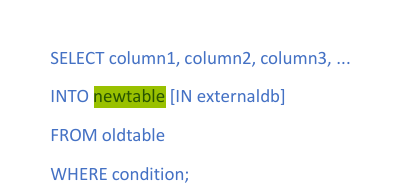

CUANDO SE EJECUTA LO DE ARRIBA NO TE PONE RESTRICCIONES NI PK, NI NADA